#**Does_Money_Buy_Happiness**

Se importaron los datos desde el archivo **"Felicidad_vs_GDP.csv"** al entorno de trabajo y se exploraron los países más felices y los que tienen el mayor GDP.

Primero, se ordenó la base de datos de mayor a menor felicidad utilizando la función sort_values(). Esto permitió identificar los países con los niveles más altos de felicidad. Luego, se imprimieron las primeras 10 filas de la base de datos ordenada. Posteriormente, se repitió el proceso, pero esta vez ordenando de mayor a menor GDP, lo que permitió observar los países con los valores más altos de GDP. Al igual que con la felicidad, también se imprimieron las primeras 10 filas para poder revisarlas.


In [41]:
import pandas as pd

# Datos y ordenarlos
data = pd.read_csv('Felicidad_vs_GDP.csv')
happiness_data = data.sort_values(by='Felicidad', ascending=False)
gdp_data = data.sort_values(by='GDP', ascending=False)

# Mostrar datos
print('Sorted by Happiness')
print(happiness_data.head(10))
print("\n")
print('Sorted by GDP')
print(gdp_data.head(10))


Sorted by Happiness
          Pais  Felicidad           GDP
0      Finland     7.8210  2.718370e+11
1      Denmark     7.6362  3.560850e+11
2      Iceland     7.5575  2.171808e+10
3  Switzerland     7.5116  7.522480e+11
4  Netherlands     7.4149  9.138650e+11
5   Luxembourg     7.4040  7.335313e+10
6       Sweden     7.3843  5.414870e+11
7       Norway     7.3651  3.621980e+11
8       Israel     7.3638  4.071010e+11
9  New Zealand     7.1998  2.117350e+11


Sorted by GDP
               Pais  Felicidad           GDP
15    United States     6.9768  2.089370e+13
70            China     5.5853  1.468770e+13
52            Japan     6.0389  5.040110e+12
13          Germany     7.0341  3.846410e+12
16   United Kingdom     6.9425  2.756900e+12
130           India     3.7771  2.667690e+12
19           France     6.6867  2.630320e+12
29            Italy     6.4667  1.892570e+12
14           Canada     7.0251  1.645420e+12
57      South Korea     5.9351  1.637900e+12


Se transformó el **GDP** a escala logarítmica usando el logaritmo base 10. Luego, se graficaron las observaciones en un **scatterplot**, con el **GDP** en su escala logarítmica como el eje **x** y el nivel de **felicidad** como el eje **y**. Los puntos se representaron con un color **lightblue** y bordes **cian** para facilitar la visualización de la relación entre ambas variables.

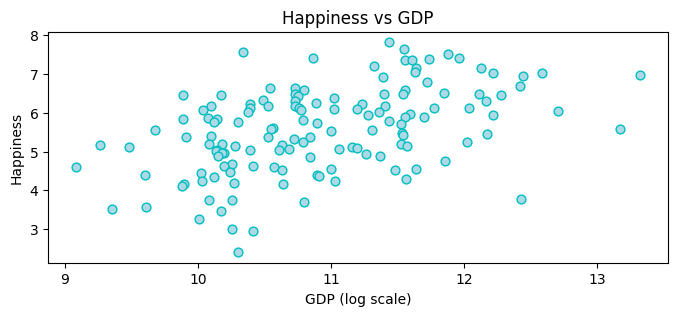

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Transformación del PIB (GDP) a escala logarítmica
data_GDP_log = np.log10(data['GDP'])

# Scatterplot
plt.figure(figsize=(8, 3))
plt.scatter(data_GDP_log, data['Felicidad'], c='lightblue', edgecolor='c', s=40)
plt.xlabel('GDP (log scale)')
plt.ylabel('Happiness')
plt.title('Happiness vs GDP')
plt.show()

> _A simple vista, se puede observar que, en general, existe una tendencia positiva: a medida que el GDP aumenta, también lo hace el nivel de felicidad. Esto sugiere que, en los datos representados, los países con un mayor Producto Interno Bruto tienden a reportar mayores niveles de felicidad._



Se calcularon los **coeficientes** del modelo de regresión lineal simple de forma manual. Primero, se obtuvieron los promedios de GDP (en su forma logarítmica) y de felicidad. Luego, se calculó el coeficiente **𝐵1** y, finalmente, se calculó **𝐵0**. Ambos valores se imprimieron para conocer la pendiente y la intersección de la recta de regresión.

In [25]:
# Calcular promedios
x_mean = np.mean(data_GDP_log)
y_mean = np.mean(data['Felicidad'])

# Calcular coeficientes
numerator = np.sum((data_GDP_log - x_mean) * (data['Felicidad'] - y_mean))
denominator = np.sum((data_GDP_log - x_mean) ** 2)
B1 = numerator / denominator
B0 = y_mean - (B1 * x_mean)

# Mostrar resultados
print("B1 =", B1)
print("B0 =", B0)

B1 = 0.628128465881041
B0 = -1.3023500570747295


Se realizó una nueva gráfica donde aparte de mostrar los resultados de la base de datos, se muestra la **línea** que representa el **modelo de regresión lineal simple**.

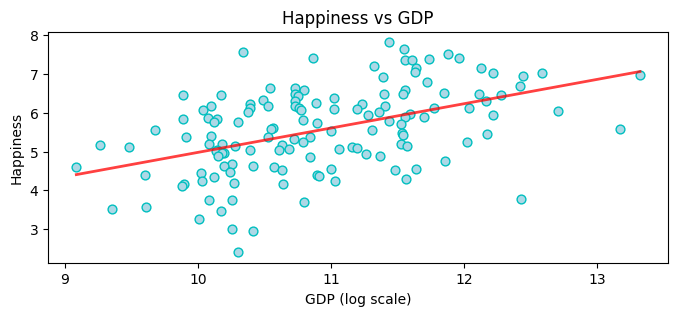

In [27]:
# Scatterplot
plt.figure(figsize=(8, 3))
plt.scatter(data_GDP_log, data['Felicidad'], c='lightblue', edgecolor='c', s=40)
plt.xlabel('GDP (log scale)')
plt.ylabel('Happiness')
plt.title('Happiness vs GDP')

# Gráfica del modelo de regresión
x = np.linspace(min(data_GDP_log), max(data_GDP_log), 100)
y = B0 + B1 * x
plt.plot(x, y, color='red', linewidth=2, alpha=0.75)
plt.show()

Se calculó el **RSS** del modelo.

In [28]:
# Cálculo del RSS
RSS = np.sum((data['Felicidad'] - (B0 + B1 * data_GDP_log)) ** 2)
print("RSS =", RSS)

RSS = 131.3738317732635


Se usó la fórmula del error estándar de 𝛽1 para calcular la precisión de la pendiente de la regresión. Este cálculo tomó en cuenta la desviación estándar de los residuos y la varianza de los valores de 𝑥 (GDP). Con el error estándar obtenido, se determinó el intervalo de confianza de 𝛽1, el cual nos da un rango dentro del cual podemos estar seguros que se encuentra la pendiente verdadera.
Luego, se verificó si el intervalo de confianza de 𝛽1 incluía el valor cero. Si no lo incluía, se concluyó que la relación entre la felicidad y el GDP era significativa. Además, si el valor p resultó menor a 0.05, la asociación también se consideró estadísticamente significativa.Un valor p bajo indica que es poco probable que el efecto observado se deba al azar.

In [37]:
# Error estándar
n = len(data_GDP_log)
SE = np.sqrt(RSS / ((n - 2)* sum((data_GDP_log-x_mean)**2)))
print("SE =", SE)

import numpy as np
from scipy.stats import t

# Intervalo de confianza
alpha = 0.05
t_crit = t.ppf(1 - alpha / 2, n - 2)  # Valor crítico t
lower_bound = B1 - t_crit * SE
upper_bound = B1 + t_crit * SE
print("Intervalo de confianza para β̂1: [", lower_bound, ",", upper_bound, "]")

# Prueba de significancia
t_stat = B1 / SE  # Estadístico t
print("T stat =",t_stat)
p_value = 2 * (1 - t.cdf(abs(t_stat), n - 2))  # Valor p
print("P value =", p_value)

if p_value < alpha:
    print(f"La asociación entre felicidad y GDP es significativa porque p = {p_value:.5f}, lo cual es menor que α = {alpha}.")
else:
    print(f"La asociación entre felicidad y GDP NO es significativa porque p = {p_value:.5f}, lo cual es mayor que α = {alpha}.")


SE = 0.09983378435340727
Intervalo de confianza para β̂1: [ 0.43073933130733133 , 0.8255176004547506 ]
T stat = 6.291742519320849
P value = 3.825717964645037e-09
La asociación entre felicidad y GDP es significativa porque p = 0.00000, lo cual es menor que α = 0.05.


Se calculó el error estándar residual (RSE) usando la suma de los cuadrados de los residuos (RSS) y el número de observaciones. Luego, se calculó el valor de R^2 para ver qué tan bien el modelo explica la variabilidad de los datos. Ambos valores se imprimieron en la consola.

In [43]:
RSE = np.sqrt(RSS / (n - 2))
print("RSE =", RSE)
r_squared = 1 - (RSS / np.sum((data['Felicidad'] - y_mean) ** 2))
print("R^2 =", r_squared)
print("El valor de R^2 indica que el modelo explica solo el 22% de la variabilidad de los datos. Creo que el modelo no ajusta muy bien a los datos, ya que una gran parte de la variabilidad no está siendo explicada por el modelo.")

RSE = 0.9721807858537376
R^2 = 0.22166361654970657
El valor de R^2 indica que el modelo explica solo el 22% de la variabilidad de los datos. Creo que el modelo no ajusta muy bien a los datos, ya que una gran parte de la variabilidad no está siendo explicada por el modelo.


Se usó la función **OLS()** de **statsmodels.api** para ajustar el modelo y verificar los resultados anteriores. Si el resumen mostraba un valor p de 0.000, se usó **results.pvalues** para obtener más cifras significativas. Además, como el RSE no se muestra por defecto, se calculó con **results.scale** y se le aplicó la raíz cuadrada para obtener el valor.

In [45]:
import statsmodels.api as smod
model = smod.OLS(data['Felicidad'], smod.add_constant(data_GDP_log))
results = model.fit()
print(results.summary())
print("P values:", results.pvalues)
print("RSE:", results.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     39.59
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           3.83e-09
Time:                        04:17:26   Log-Likelihood:                -195.09
No. Observations:                 141   AIC:                             394.2
Df Residuals:                     139   BIC:                             400.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3024      1.094     -1.191      0.2

De este proyecto, puedo decir que el valor de R^2 muestra que el modelo solo explica el 22% de la variabilidad de los datos. Esto significa que el modelo no ajusta tan bien, porque una gran parte de la variabilidad no está siendo explicada. En cuanto a la pregunta **"¿El dinero compra la felicidad?"**, se puede decir que sí, ya que vemos que hay una relación entre las dos cosas. Sin embargo, hay muchos otros factores que también afectan la felicidad. **El dinero es importante, pero no es lo único que influye.**